In [2]:
#import necessary modules
from pyhdf import SD
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
filename1='MOD21.A2016001.1515.006.2017215165634.hdf'
hdf=SD.SD(filename1)
hdf.datasets()

{'Emis_29': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  4),
 'Emis_29_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  8),
 'Emis_31': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  5),
 'Emis_31_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  9),
 'Emis_32': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  6),
 'Emis_32_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  10),
 'Emis_ASTER': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  21,
  12),
 'LST': (('swath_lines_1km:MOD_Swath_LST', 'swath_pixels_1km:MOD_Swath_LST'),
  (2030, 1354),
  23,
  2),
 'LST_err': (('swath_lines_1km:MOD_Swath_LST',
   'swath_pixels_1km:MOD_Swath_LST'),
 

In [4]:
pwvds=hdf.select('PWV')

In [5]:
pwvds.attributes()

{'_FillValue': 0,
 '_Offset': 0.0,
 '_Scale': 0.001,
 'coordsys': 'cartesian',
 'format': 'scaled',
 'long_name': 'Water vapor',
 'units': 'cm',
 'valid_range': [0.0, 65535.0]}

In [6]:
units=pwvds.attributes(full=1)['units'][0]

In [106]:
pwv=pwvds[:]*pwvds.attributes()['_Scale']

In [107]:
pwv

array([[ 3.408,  3.405,  3.401, ...,  2.989,  2.991,  2.991],
       [ 3.42 ,  3.417,  3.413, ...,  2.991,  2.993,  2.994],
       [ 3.432,  3.429,  3.425, ...,  2.993,  2.995,  2.996],
       ..., 
       [ 5.788,  5.796,  5.803, ...,  5.994,  5.995,  5.996],
       [ 5.783,  5.791,  5.798, ...,  5.997,  5.999,  6.   ],
       [ 5.778,  5.786,  5.793, ...,  6.001,  6.002,  6.004]])

In [11]:
latitude=hdf.select('Latitude')[:]
longitude=hdf.select('Longitude')[:]

In [18]:
import geotiepoints as gp

In [19]:
longitude.shape

(406, 271)

In [20]:
lon1km,lat1km=gp.modis5kmto1km(longitude,latitude)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/geotiepoints/geointerpolator.py:104: RuntimeWarning: invalid value encountered in arcsin
  / EARTH_RADIUS))))


In [21]:
lon1km.shape

(2030, 1354)

In [68]:
nlev=20
levels = np.linspace(0,10,nlev+1)
colors=plt.cm.Blues(levels/10)
cmap = mpl.colors.ListedColormap(colors)
bounds = np.arange(nlev)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [70]:
cmap.N

21

In [72]:
Z = np.zeros(z.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(z >= levels[j], z < levels[j+1])] = j  
Z[z >= levels[-1]] = len(levels)

In [73]:
Z

array([[  6.,   6.,   6., ...,   5.,   5.,   5.],
       [  6.,   6.,   6., ...,   5.,   5.,   5.],
       [  6.,   6.,   6., ...,   5.,   5.,   5.],
       ..., 
       [ 11.,  11.,  11., ...,  11.,  11.,  11.],
       [ 11.,  11.,  11., ...,  11.,  11.,  11.],
       [ 11.,  11.,  11., ...,  11.,  11.,  11.]])

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


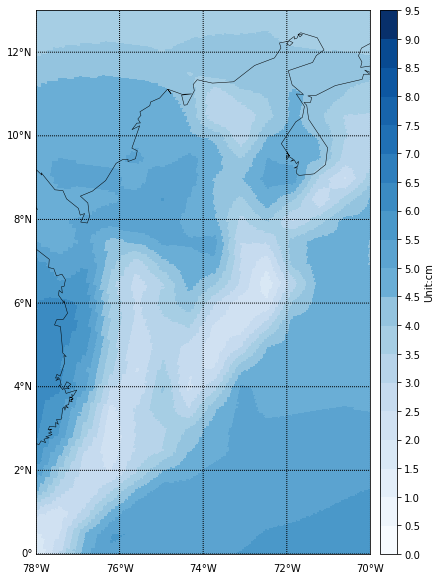

In [74]:

plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)


/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


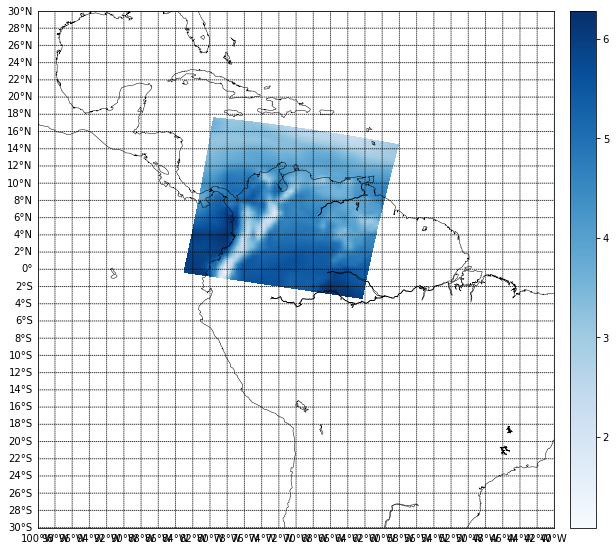

In [92]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-30, urcrnrlat = 30,
            llcrnrlon=-100, urcrnrlon = -40)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, pwv, latlon=True, cmap='Blues')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

#color_bar.set_ticks(range(nlev))
#color_bar.set_ticklabels(levels)
#color_bar.set_label('Unit:'+units)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


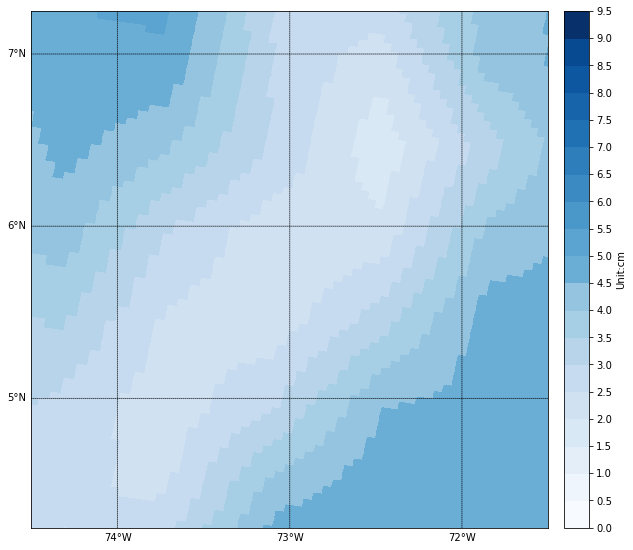

In [75]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=4.25, urcrnrlat = 7.25,
            llcrnrlon=-74.5, urcrnrlon = -71.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

In [83]:
Z = np.zeros(pwv.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(pwv >= levels[j], pwv < levels[j+1])] = j  
Z[pwv >= levels[-1]] = len(levels)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


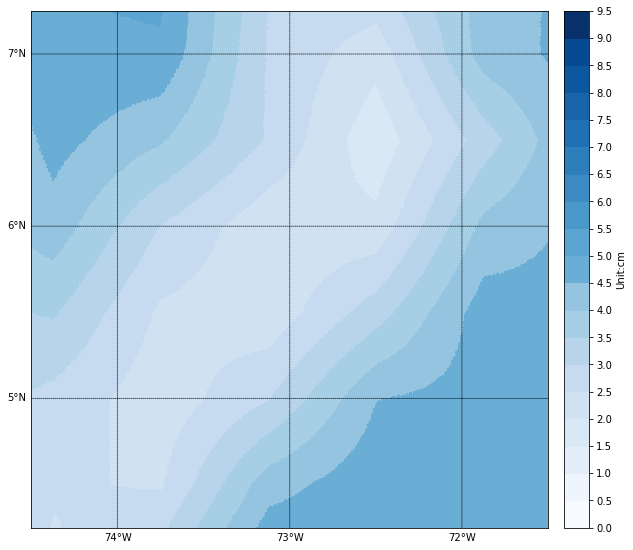

In [85]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=4.25, urcrnrlat = 7.25,
            llcrnrlon=-74.5, urcrnrlon = -71.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


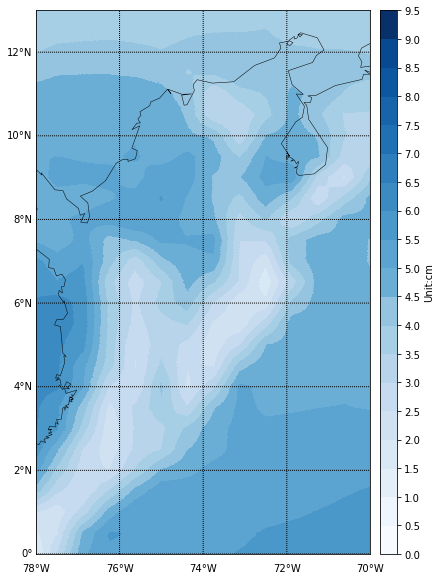

In [84]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


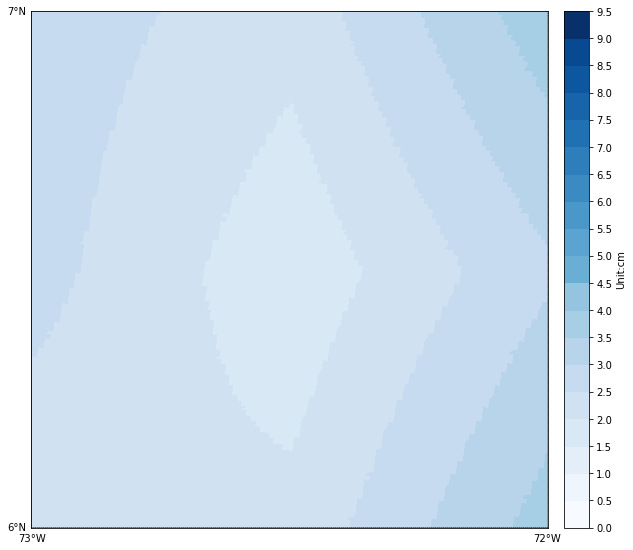

In [86]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=6, urcrnrlat = 7,
            llcrnrlon=-73, urcrnrlon = -72)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

In [158]:
from pyresample.geometry import SwathDefinition
from pyresample.kd_tree import resample_nearest

In [324]:
degtokm=110.567
xi = np.arange(-78,-70,1/degtokm)
yi = np.arange(0,13,1/degtokm)
XI, YI = np.meshgrid(xi,yi)
def_a = SwathDefinition(lons=XI, lats=YI)


In [167]:
def_b = SwathDefinition(lons=lon1km, lats=lat1km)

In [171]:
interp_dat = resample_nearest(def_b,pwv,def_a,radius_of_influence=5000)

In [172]:
interp_dat

array([[ 1.48 ,  1.527,  1.527, ...,  5.519,  5.519,  5.518],
       [ 1.48 ,  1.527,  1.552, ...,  5.521,  5.521,  5.52 ],
       [ 1.507,  1.536,  1.536, ...,  5.522,  5.522,  5.522],
       ..., 
       [ 3.65 ,  3.65 ,  3.648, ...,  3.603,  3.602,  3.601],
       [ 3.647,  3.647,  3.648, ...,  3.6  ,  3.599,  3.597],
       [ 3.643,  3.643,  3.644, ...,  3.596,  3.595,  3.594]])

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


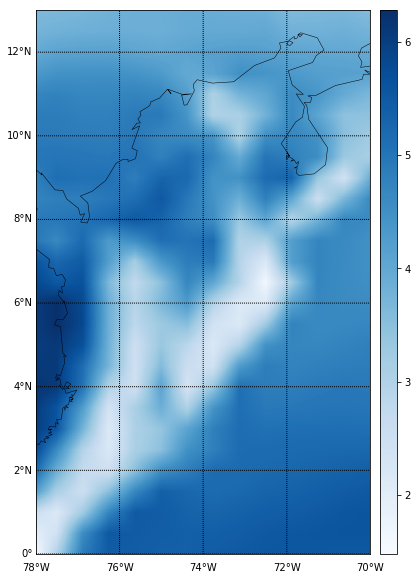

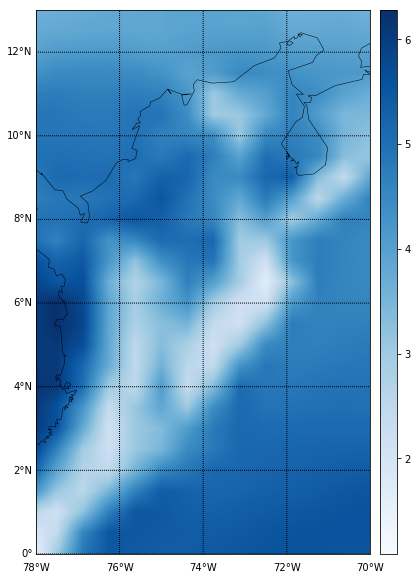

In [180]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)

m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(XI, YI, interp_dat, latlon=True, cmap='Blues')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

#color_bar.set_ticks(range(nlev))
#color_bar.set_ticklabels(levels)
#color_bar.set_label('Unit:'+units)
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(lon1km, lat1km, pwv, latlon=True, cmap='Blues')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

#color_bar.set_ticks(range(nlev))
#color_bar.set_ticklabels(levels)
#color_bar.set_label('Unit:'+units)

In [185]:
flist=np.loadtxt('filelist.txt',dtype='str')

In [273]:
flist

array(["b'MOD21.A2016001.1515.006.2017215165634.hdf'",
       "b'MOD21.A2016002.0340.006.2017215171624.hdf'",
       "b'MOD21.A2016002.1600.006.2017215171547.hdf'",
       "b'MOD21.A2016003.0245.006.2017215171415.hdf'",
       "b'MOD21.A2016003.1505.006.2017215171805.hdf'",
       "b'MOD21.A2016004.0325.006.2017215175805.hdf'",
       "b'MOD21.A2016004.0330.006.2017215175618.hdf'",
       "b'MOD21.A2016004.1545.006.2017215181125.hdf'",
       "b'MOD21.A2016005.0235.006.2017215181246.hdf'",
       "b'MOD21.A2016005.1450.006.2017215193045.hdf'",
       "b'MOD21.A2016006.0315.006.2017215193357.hdf'",
       "b'MOD21.A2016006.1535.006.2017215193542.hdf'",
       "b'MOD21.A2016007.0400.006.2017215193823.hdf'",
       "b'MOD21.A2016007.1440.006.2017215211313.hdf'",
       "b'MOD21.A2016090.0250.006.2017216035303.hdf'",
       "b'MOD21.A2016090.1510.006.2017216035504.hdf'"], 
      dtype='<U44')

In [300]:
%%time
processed=[]
for i in flist:
    i=i[2:-1]
    hdf=SD.SD(i)
    pwvds=hdf.select('PWV')
    pwv=pwvds[:]*pwvds.attributes()['_Scale']
    latitude=hdf.select('Latitude')[:]
    longitude=hdf.select('Longitude')[:]
    lon1km,lat1km=gp.modis5kmto1km(longitude,latitude)
    def_b = SwathDefinition(lons=lon1km, lats=lat1km)
    interp=resample_nearest(def_b,pwv,def_a,radius_of_influence=5000)
    interp[interp==0]=np.nan
    processed += [interp]
    

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/geotiepoints/geointerpolator.py:104: RuntimeWarning: invalid value encountered in arcsin
  / EARTH_RADIUS))))


CPU times: user 1min 51s, sys: 1.52 s, total: 1min 53s
Wall time: 1min 17s


In [301]:
%%time
degtokm=110.567
xi = np.arange(-75,-72,1/degtokm)
yi = np.arange(4,9,1/degtokm)
XI, YI = np.meshgrid(xi,yi)
def_a = SwathDefinition(lons=XI, lats=YI)
processed=[]
for i in flist:
    i=i[2:-1]
    hdf=SD.SD(i)
    pwvds=hdf.select('PWV')
    pwv=pwvds[:]*pwvds.attributes()['_Scale']
    latitude=hdf.select('Latitude')[:]
    longitude=hdf.select('Longitude')[:]
    lon1km,lat1km=gp.modis5kmto1km(longitude,latitude)
    def_b = SwathDefinition(lons=lon1km, lats=lat1km)
    interp=resample_nearest(def_b,pwv,def_a,radius_of_influence=5000)
    interp[interp==0]=np.nan
    processed += [interp]

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/geotiepoints/geointerpolator.py:104: RuntimeWarning: invalid value encountered in arcsin
  / EARTH_RADIUS))))


CPU times: user 1min 39s, sys: 640 ms, total: 1min 40s
Wall time: 1min 13s


In [ ]:
# 2 minutes per week, 8 minutes per month, 1.6 hours per year, 16-24 hours total approx.
# doable

# 100 M per week, 400 M per month, 4.8 G per year, 48-80 G total approx

In [287]:
pro_pwv=np.array(processed)

In [288]:
mean_pwv=np.nanmean(pro_pwv,axis=0)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/geotiepoints/geointerpolator.py:104: RuntimeWarning: invalid value encountered in arcsin
  / EARTH_RADIUS))))
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


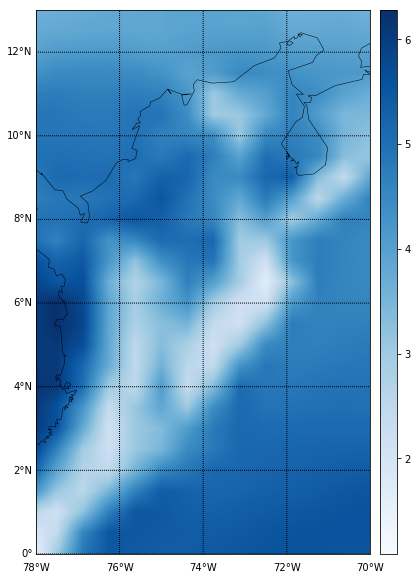

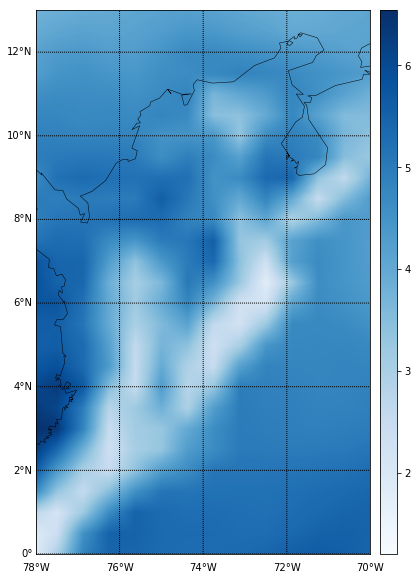

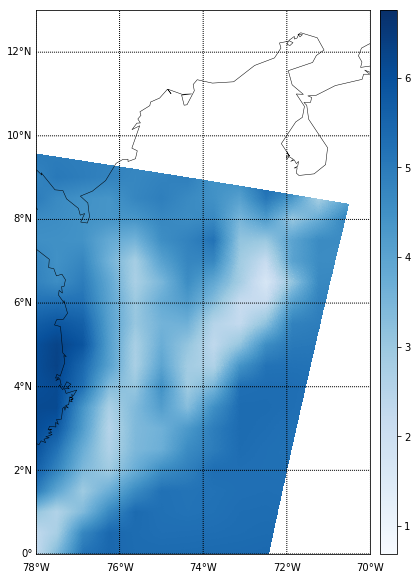

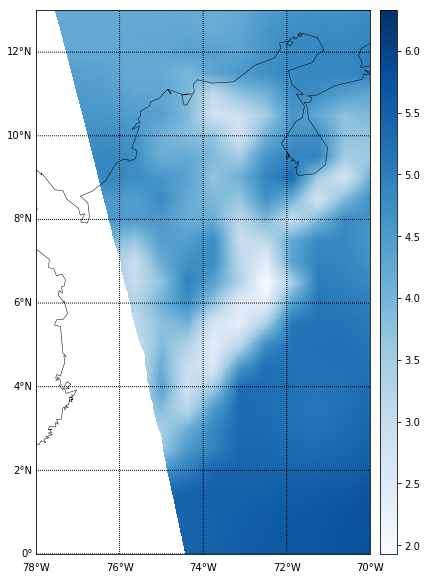

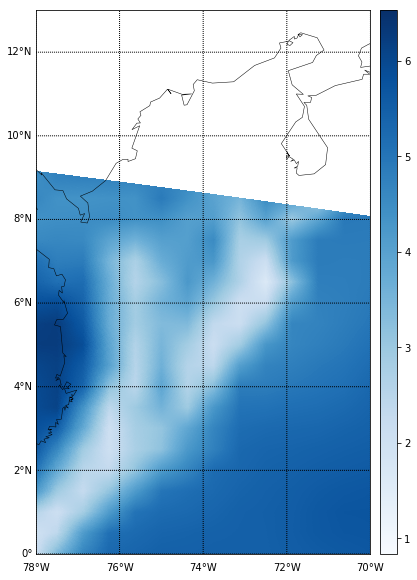

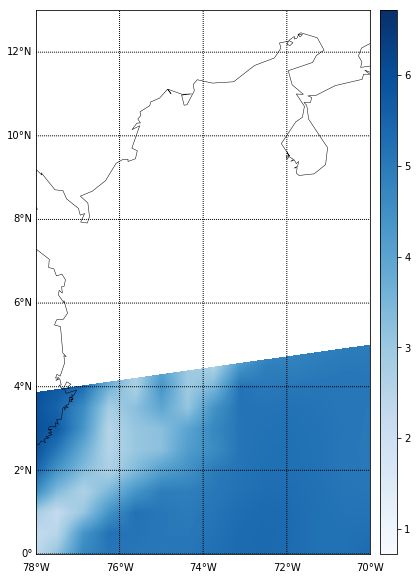

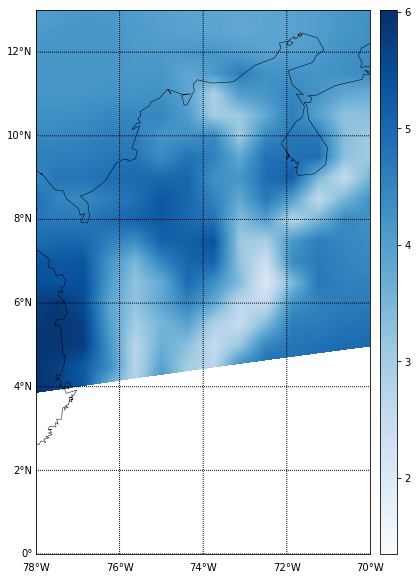

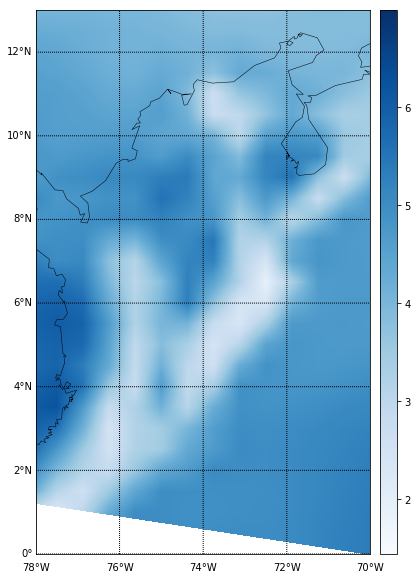

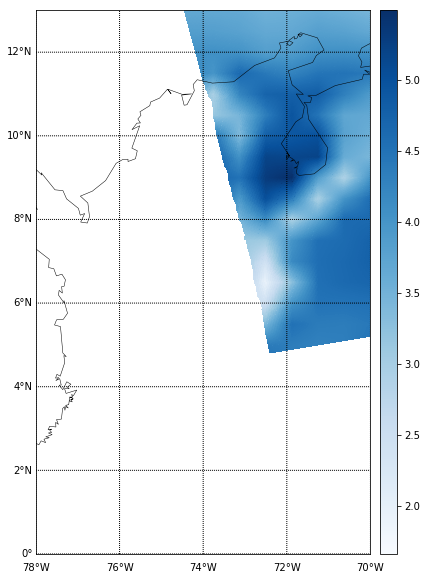

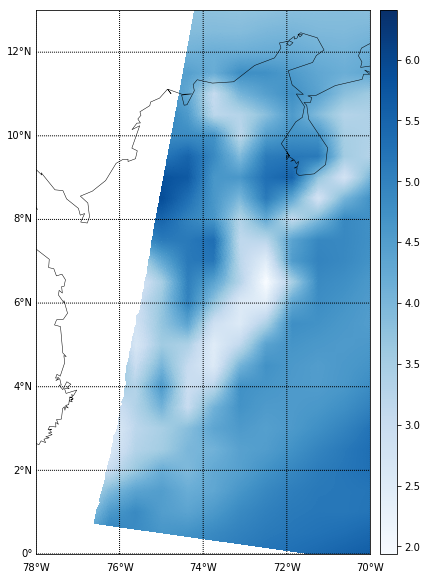

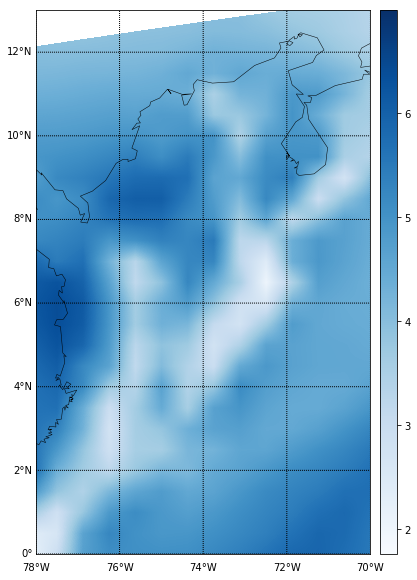

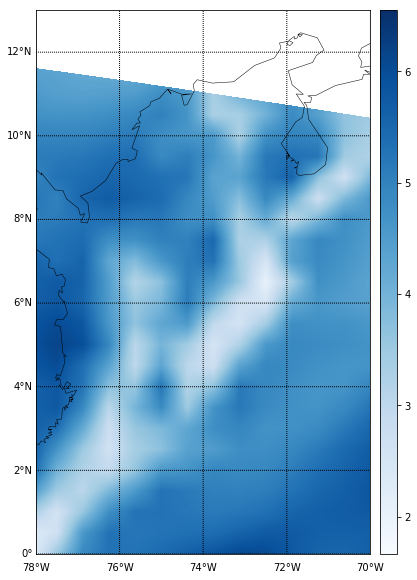

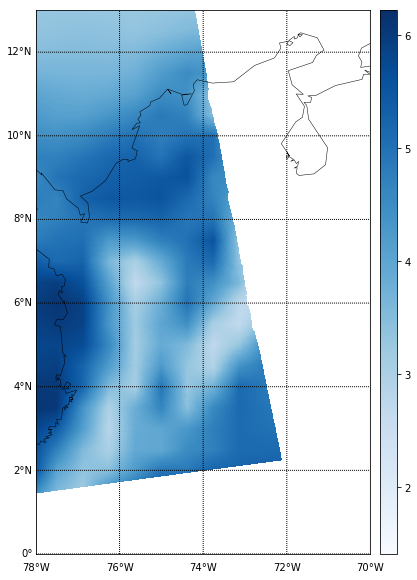

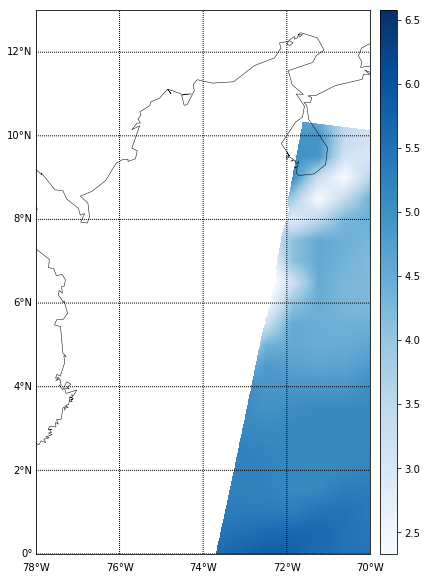

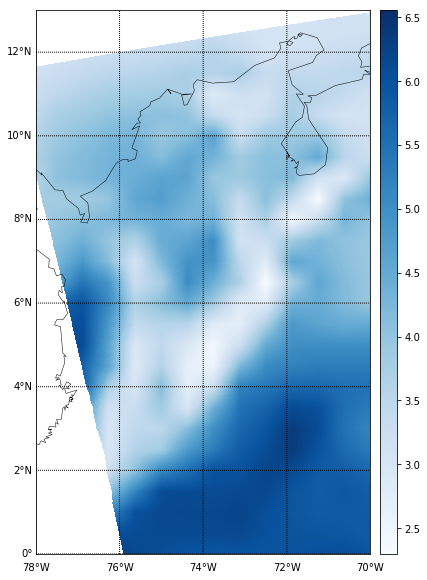

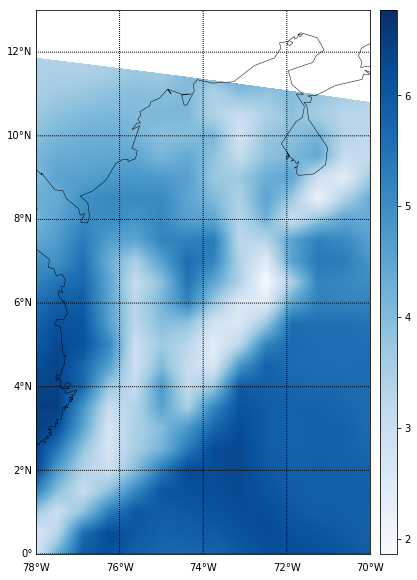

In [285]:
for i in flist:
    i=i[2:-1]
    hdf=SD.SD(i)
    pwvds=hdf.select('PWV')
    pwv=pwvds[:]*pwvds.attributes()['_Scale']
    latitude=hdf.select('Latitude')[:]
    longitude=hdf.select('Longitude')[:]
    lon1km,lat1km=gp.modis5kmto1km(longitude,latitude)
    plt.figure(figsize=(10,10))
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=0, urcrnrlat = 13,
                llcrnrlon=-78, urcrnrlon = -70)

    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
    m.pcolormesh(lon1km, lat1km, pwv, latlon=True, cmap='Blues')
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "5%", pad="3%")
    color_bar = plt.colorbar(cax=cax)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


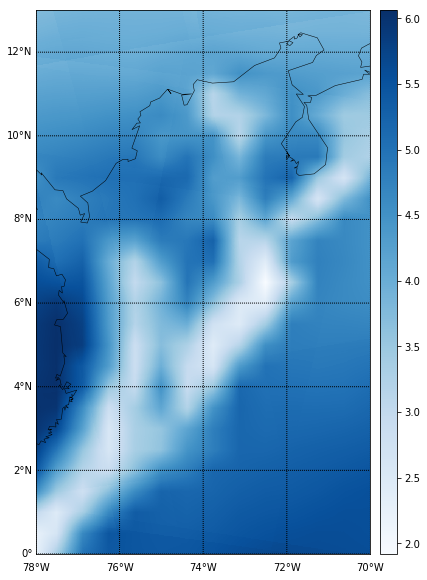

In [289]:
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)

m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 2.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 2.), labels=[0, 0, 0, 1])
m.pcolormesh(XI, YI, mean_pwv, latlon=True, cmap='Blues')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

In [290]:
nlev=20
levels = np.linspace(0,10,nlev+1)
colors=plt.cm.Blues(levels/10)
cmap = mpl.colors.ListedColormap(colors)
bounds = np.arange(nlev)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [291]:
z=mean_pwv

In [292]:
Z = np.zeros(z.shape, dtype=np.float64)
for j in np.arange(len(levels)-1):
    Z[np.logical_and(z >= levels[j], z < levels[j+1])] = j  
Z[z >= levels[-1]] = len(levels)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


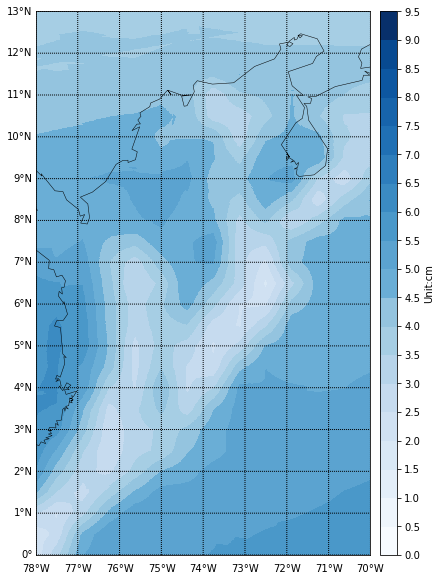

In [293]:

plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=0, urcrnrlat = 13,
            llcrnrlon=-78, urcrnrlon = -70)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 1.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 1.), labels=[0, 0, 0, 1])
m.pcolormesh(XI, YI, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


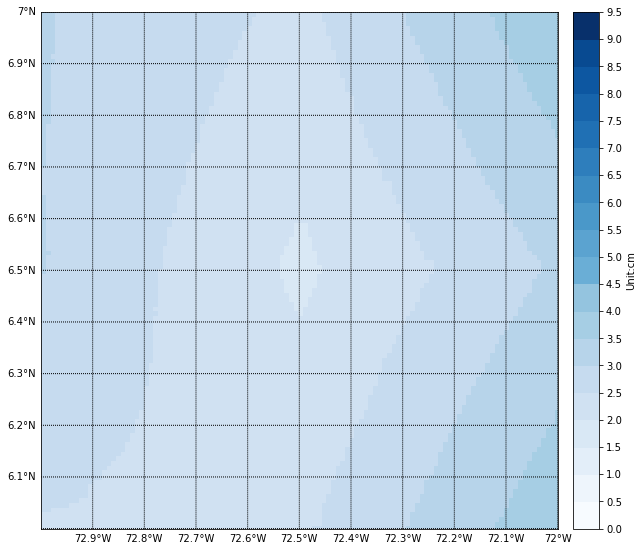

In [327]:

plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=6, urcrnrlat = 7,
            llcrnrlon=-73, urcrnrlon = -72)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 0.1), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180, 180., 0.1), labels=[0, 0, 0, 1])
m.pcolormesh(XI, YI, Z, latlon=True, cmap=cmap, norm=norm)
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
color_bar = plt.colorbar(cax=cax)

color_bar.set_ticks(range(nlev))
color_bar.set_ticklabels(levels)
color_bar.set_label('Unit:'+units)

In [294]:
flon=(XI<=-72)&(XI>=-73)
flat=(YI>=6)&(YI<=7)
filter=flon&flat

In [295]:
np.argwhere(filter)

array([[664, 553],
       [664, 554],
       [664, 555],
       ..., 
       [773, 661],
       [773, 662],
       [773, 663]])

In [308]:
(filter.sum(axis=0)/110).sum()

111.0

In [310]:
crop_pwv=mean_pwv[filter].reshape(110,111)

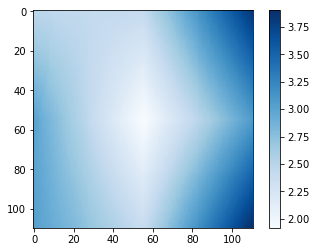

In [313]:
plt.imshow(crop_pwv,cmap='Blues')
plt.colorbar()

In [317]:
np.argmin(mean_pwv)

636038

In [323]:
mean_pwv.shape

(1438, 885)

In [318]:
np.unravel_index(mean_pwv.argmin(), mean_pwv.shape)

(718, 608)

In [325]:
XI[718, 608]

-72.501071748349204

In [326]:
YI[718, 608]

6.4938001392820652